In [ ]:
Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

Q5. Assignment:
L Import the necessary libraries and load the dataseg
L Split the dataset into training and testing setZ
L Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
L Create an instance of the SVC classifier and train it on the training datW
L hse the trained classifier to predict the labels of the testing datW
L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performanc_
L Train the tuned classifier on the entire dataseg
L Save the trained classifier to a file for future use.


 You can use any dataset of your choice for this assignment, but make sure it is suitable for
classification and has a sufficient number of features and samples.

Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?
both polynomial functions and kernel functions aim to capture nonlinear relationships in data. Polynomial functions explicitly compute higher-degree features, while kernel functions, like the polynomial kernel, implicitly map the data to higher-dimensional spaces using similarity measures. The advantage of kernel functions is that they can capture complex relationships without explicitly dealing with the computational burden of higher-dimensional feature expansion

In [ ]:
Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

# Initialize the SVM classifier with a polynomial kernel
degree_of_polynomial = 3  # The degree of the polynomial kernel
svm_classifier = SVC(kernel='poly', degree=degree_of_polynomial)

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

When you increase the value of epsilon, you are widening the ε-insensitive tube. This means that more data points can fall within this wider tube without contributing to the loss function. Consequently, data points that were previously considered outside the tube may now fall within it due to the increased tolerance for errors. This can lead to a reduction in the number of support vectors.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?
Support Vector Regression (SVR) is a powerful technique for regression tasks that aims to find a regression line that fits the data while allowing for a certain level of error. The performance of SVR is significantly influenced by its hyperparameters: choice of kernel function, C parameter, epsilon parameter, and gamma parameter. Let's explore how each parameter affects SVR and when you might adjust its value:

Kernel Function Choice:

Linear Kernel: A linear kernel is suitable when the data seems to have a linear relationship. It's the simplest kernel and often performs well when the data follows a linear pattern.
Polynomial Kernel: A polynomial kernel is useful when the relationship between the features and the target variable is nonlinear. The degree parameter controls the degree of the polynomial.
Radial Basis Function (RBF) Kernel: The RBF kernel is versatile and works well for a wide range of data distributions. The gamma parameter controls the kernel's influence; smaller values make the kernel smoother, while larger values make it more complex.
Example: Choose the kernel based on your understanding of the data's underlying relationship. If you suspect nonlinearity, start with the RBF kernel and tune gamma.

C Parameter (Regularization):

The C parameter trades off between fitting the training data as well as possible and having a smooth decision boundary. A larger C value means a more complex decision boundary that fits the training data closely, possibly leading to overfitting.
Example: Increase C when you have high confidence in the training data and expect a low amount of noise. Decrease C to encourage a simpler, smoother model.

Epsilon Parameter:

The epsilon parameter (ε) defines the width of the ε-insensitive tube around the regression line. Larger values of epsilon allow more data points to fall within the tube without contributing to the loss function.
Example: Increase epsilon when you want to tolerate more errors in your predictions or when dealing with noisy data. Decrease epsilon when you want your model to be more accurate and focused on minimizing errors.

Gamma Parameter:

The gamma parameter influences the shape of the RBF kernel and determines the extent to which a single training example affects the decision boundary. A small gamma value results in a broader influence, while a large gamma value leads to a sharper decision boundary that closely follows the training data.
Example: Increase gamma when you want the decision boundary to be tightly fitted to the training data, which can lead to overfitting. Decrease gamma when you want to avoid overfitting and want a smoother decision boundary.

Remember, the choice of hyperparameters should be guided by the characteristics of your data, the problem you're solving, and cross-validation to prevent overfitting. It's recommended to start with a broad parameter search and refine your choices through experimentation and validation.

Q5

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
df= pd.read_csv("https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv")

In [89]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [91]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [92]:
df.shape


(918, 12)

In [93]:
df.size

11016

In [94]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [95]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


C:\Users\rajmr\AppData\Local\Temp\ipykernel_16248\4277794465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

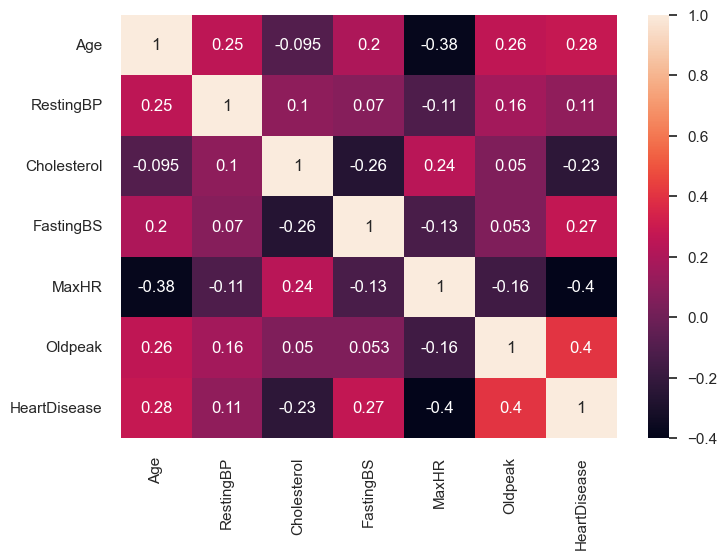

In [96]:
sns.heatmap(df.corr(),annot=True)

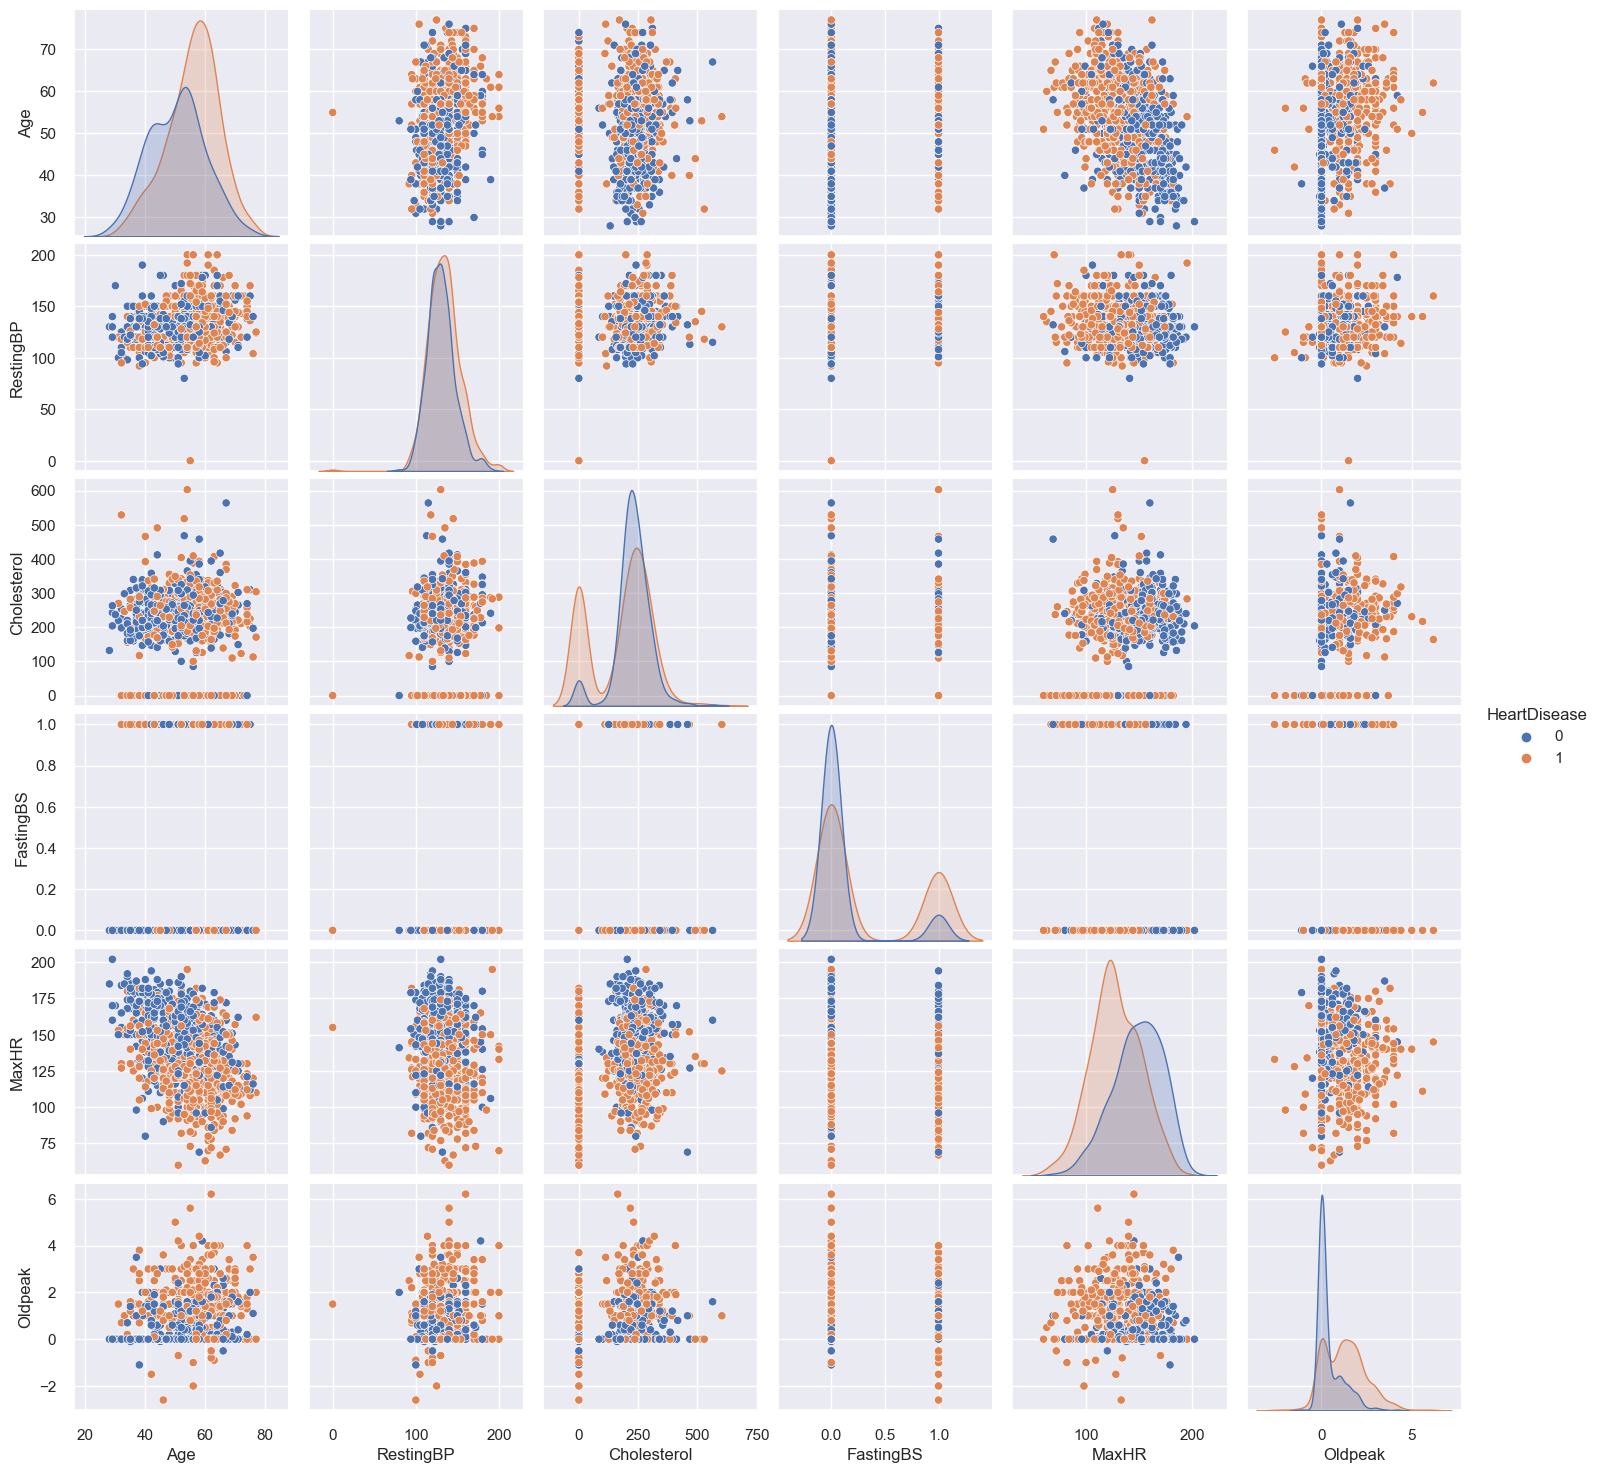

In [97]:
sns.pairplot(df,hue='HeartDisease')

In [98]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1
# average age is same for both male and female

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


In [99]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

C:\Users\rajmr\AppData\Local\Temp\ipykernel_16248\320327320.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\rajmr\AppData\Local\Temp\ipykernel_16248\320327320.py:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\rajmr\AppData\Local\Temp\ipykernel_16248\320327320.py:17: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, direc

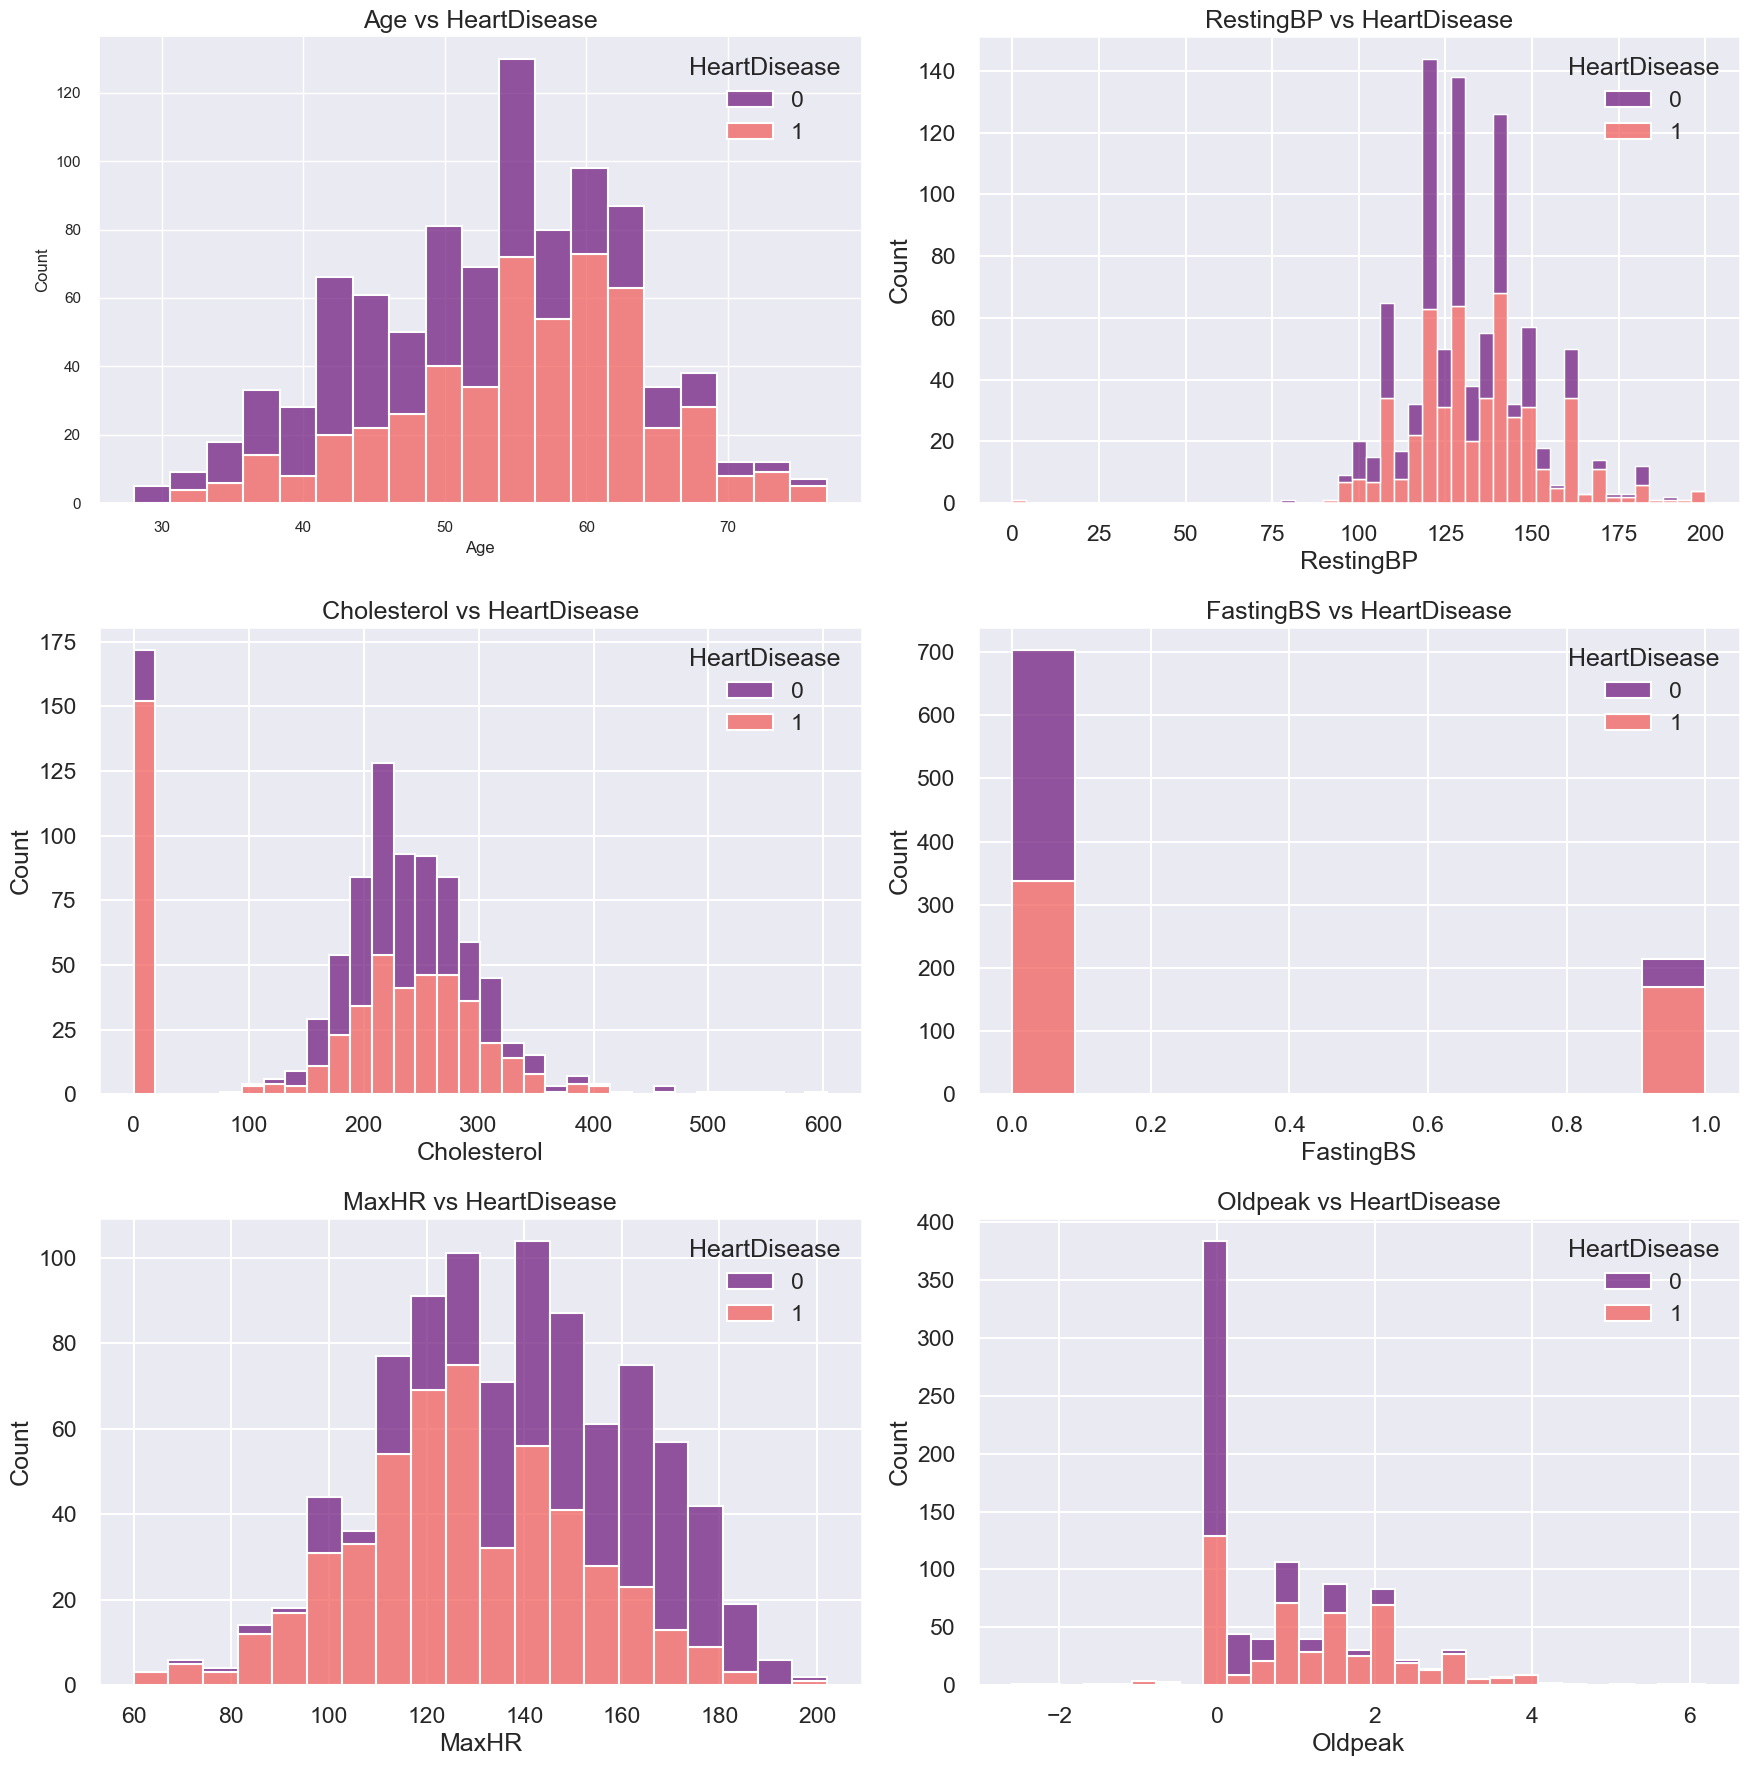

In [100]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

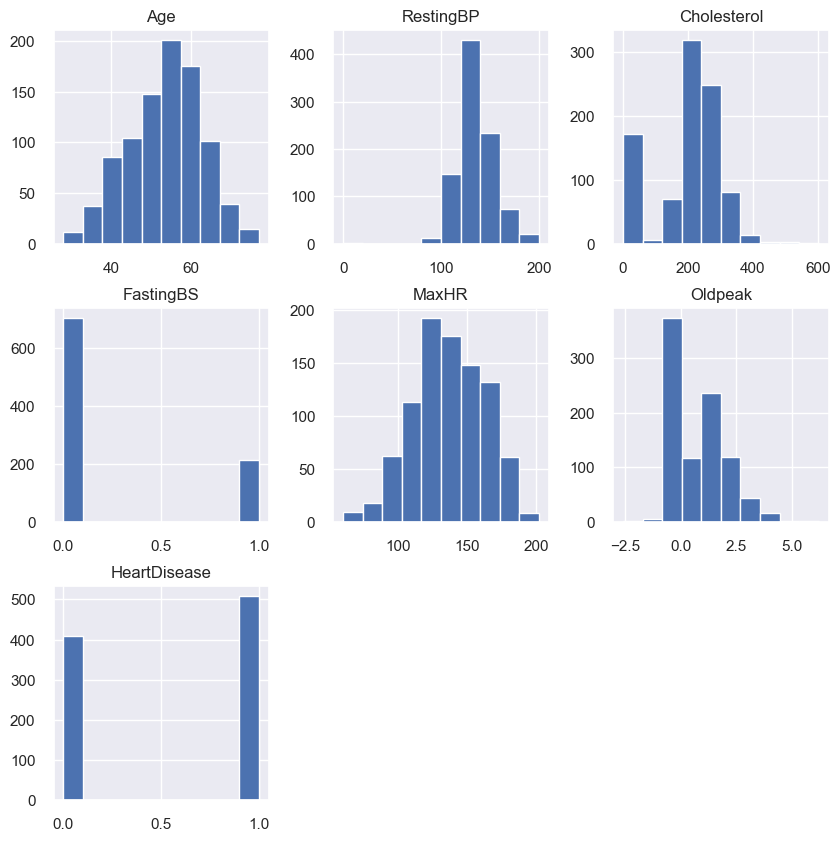

In [101]:
sns.set()
df.hist(figsize=(10,10))
plt.show()

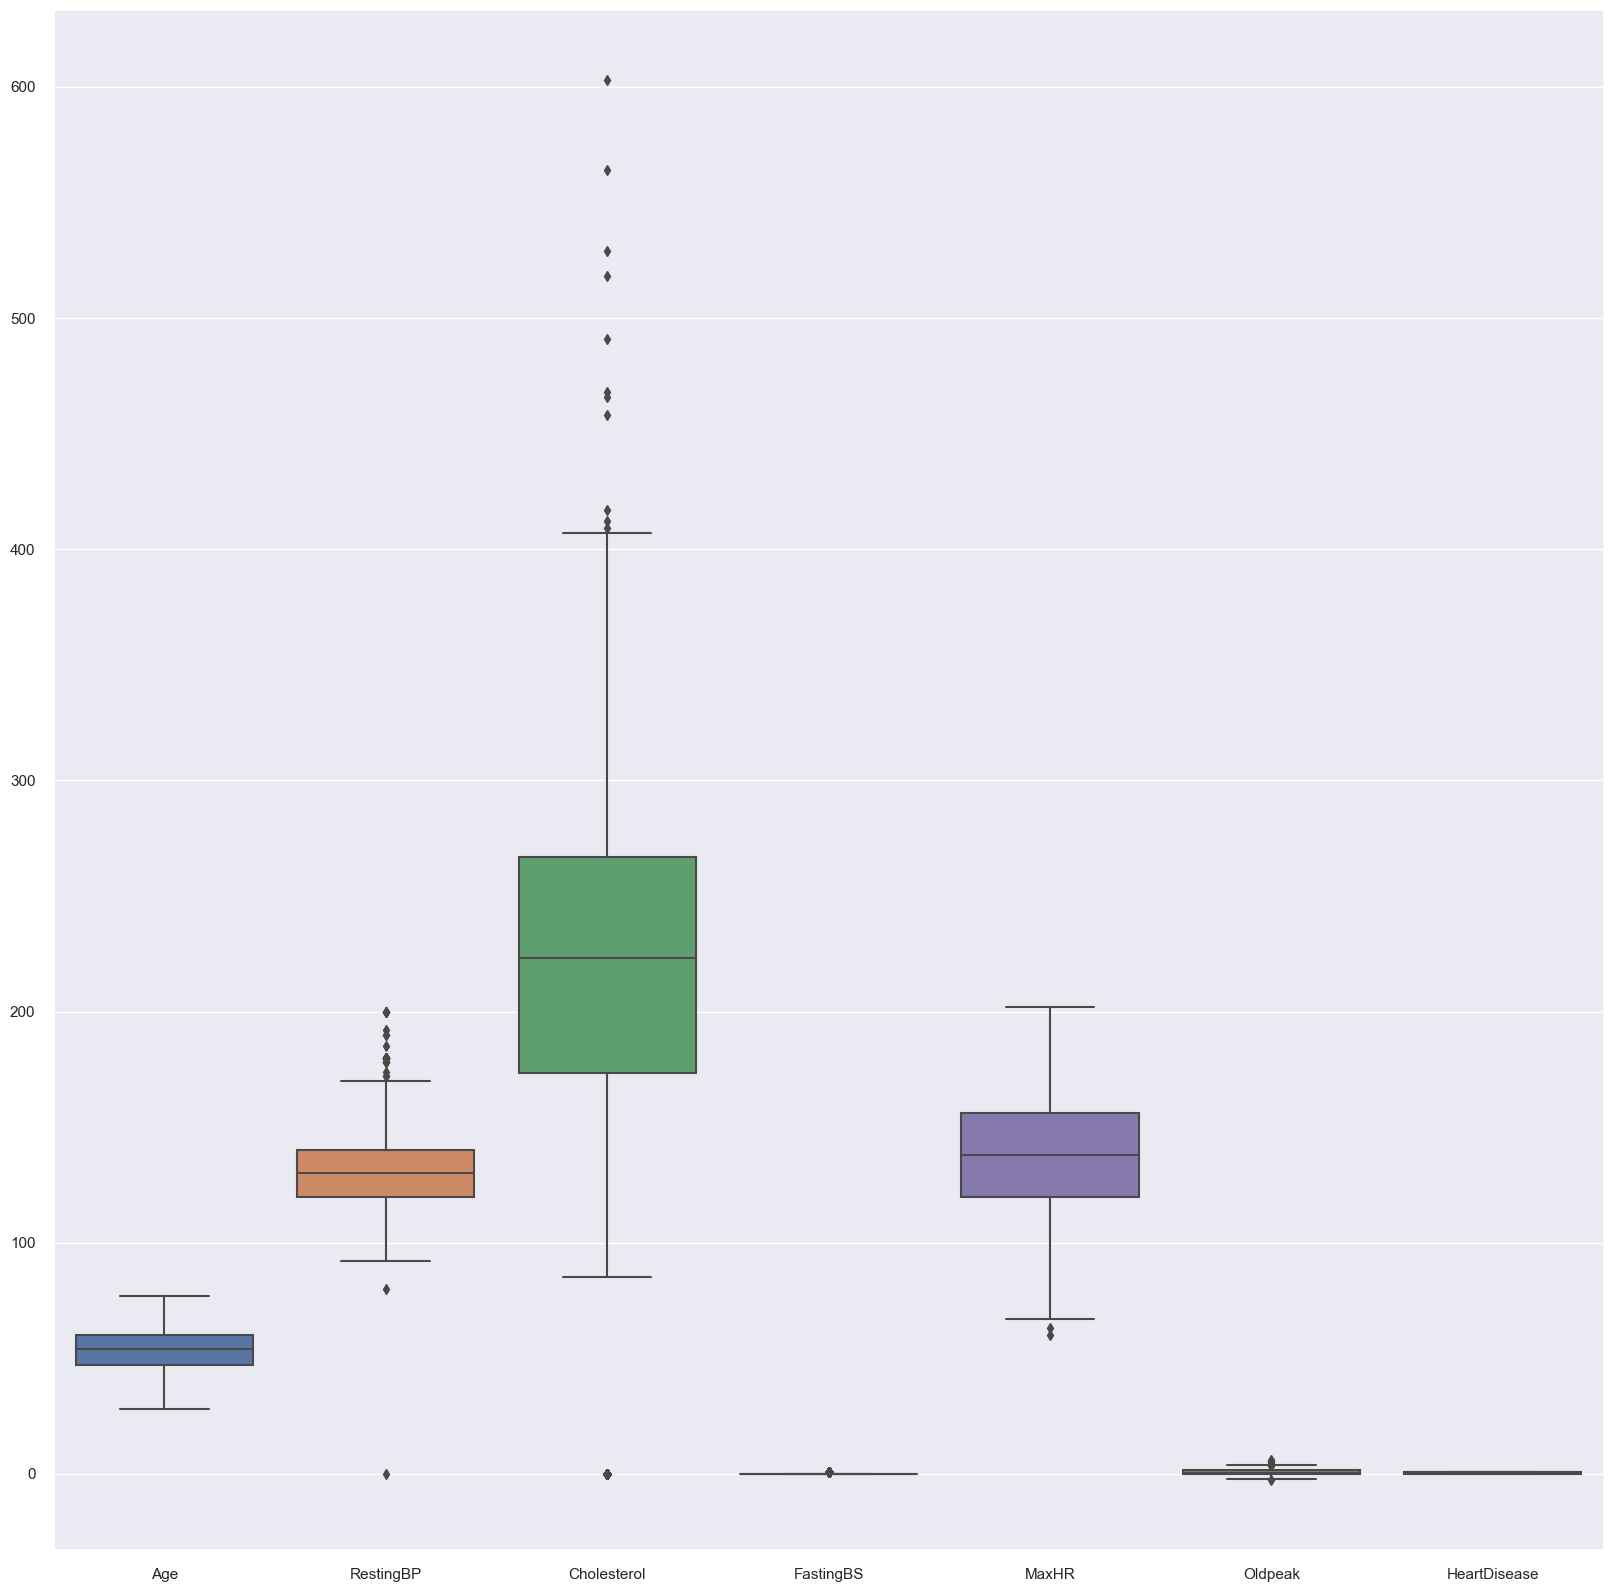

In [102]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.show()

In [103]:
def outliers_graph(df_column,name):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    floor = Q25-1.5*IQR
    ceiling = Q75+1.5*IQR
    print("-"*100)
    print("column", name)
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', floor, 'and beyond', ceiling)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <floor]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>ceiling]))
    print("-"*100)

In [104]:
categorical_column = [i for i in df.columns if df[i].dtype == 'O' ]
categorical_column

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [105]:
numerical_col = [i for i in df.columns if df[i].dtype != 'O' ]

In [106]:
for i in numerical_col:
    outliers_graph(df[i],i)

----------------------------------------------------------------------------------------------------
column Age
Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
column RestingBP
Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
column Cholesterol
Q25:  173.25
Q75:  267.0
Inter Quartile Range:  93.75
Outliers lie before 32.625

In [107]:
#from the above outliers seems that the cholestrol colum has more outlier

<Axes: xlabel='Cholesterol', ylabel='Count'>

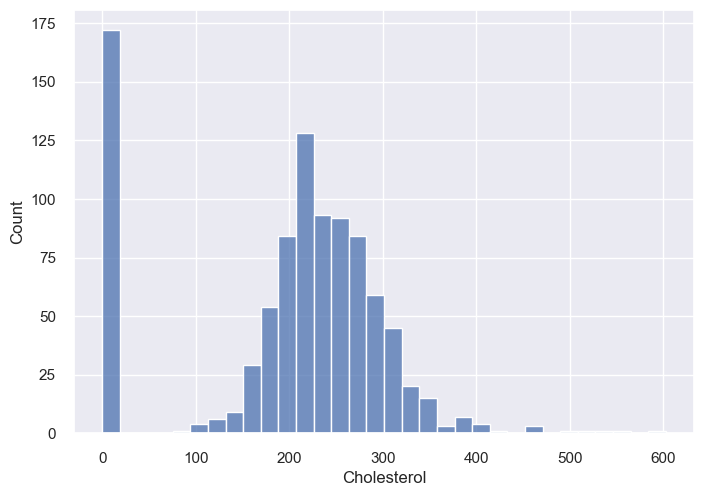

In [108]:
sns.histplot(data = df , x = df['Cholesterol'])

In [109]:
# need to replace zero with mean of the cholertrol

In [110]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  244.6353887399464


In [111]:
df[df['Cholesterol'] == 0 ]['Cholesterol'] 

293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 172, dtype: int64

(array([ 12.,  91., 288., 401.,  96.,  17.,   5.,   4.,   2.,   2.]),
 array([ 85. , 136.8, 188.6, 240.4, 292.2, 344. , 395.8, 447.6, 499.4,
        551.2, 603. ]),
 <BarContainer object of 10 artists>)

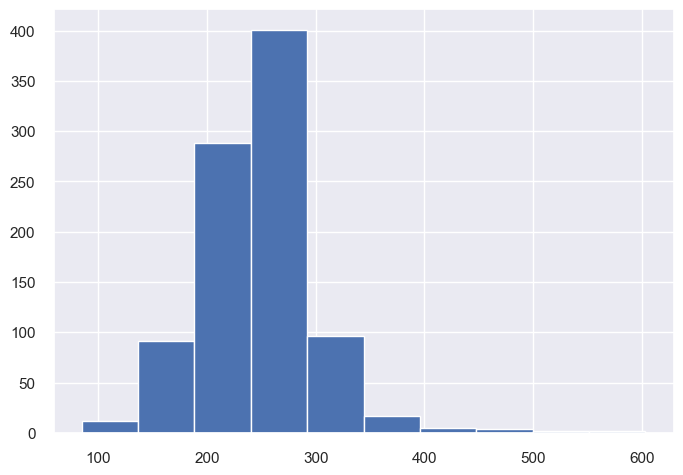

In [112]:
plt.hist(df['Cholesterol'].replace(0, mc))

In [113]:
df['Cholesterol'] = df['Cholesterol'].replace(0, mc)

In [114]:
outliers_graph(df['Cholesterol'],i)

----------------------------------------------------------------------------------------------------
column HeartDisease
Q25:  214.0
Q75:  267.0
Inter Quartile Range:  53.0
Outliers lie before 134.5 and beyond 346.5
Number of Rows with Left Extreme Outliers: 12
Number of Rows with Right Extreme Outliers: 29
----------------------------------------------------------------------------------------------------


In [115]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [116]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded=encoder.fit_transform(df[list(categorical_column)]).toarray()
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoded_df

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [117]:
df = df.drop(columns=categorical_column)

In [118]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289.0,0,172,0.0,0
1,49,160,180.0,0,156,1.0,1
2,37,130,283.0,0,98,0.0,0
3,48,138,214.0,0,108,1.5,1
4,54,150,195.0,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1
914,68,144,193.0,1,141,3.4,1
915,57,130,131.0,0,115,1.2,1
916,57,130,236.0,0,174,0.0,1


In [120]:
df = pd.concat([df, encoded_df], axis=1)

In [121]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180.0,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283.0,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214.0,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195.0,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193.0,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131.0,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236.0,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [122]:
df.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [123]:
X = df.drop(columns=['HeartDisease'])

In [124]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180.0,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283.0,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214.0,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195.0,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193.0,1,141,3.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131.0,0,115,1.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236.0,0,174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [125]:
y = df['HeartDisease']

In [126]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

In [131]:
scaled_data_X = scaler.fit_transform(X)

In [133]:
scaled_data_X

array([[-1.4331398 ,  0.41090889,  0.8325288 , ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -1.21292221, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.71993516, ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -2.13243689, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283, -0.1620483 , ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -1.30675024, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [134]:
scaled_data_X_df = pd.DataFrame(scaled_data_X,columns=X.columns)

In [135]:
scaled_data_X_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.832529,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-1.212922,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.719935,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,-0.574892,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.931438,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.363389,-0.551341,-0.188999,0.293283,-0.515952,0.515952,-1.084138,-0.481887,-0.532838,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
914,1.536902,0.627078,-0.968969,1.813758,0.164684,2.357094,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
915,0.370100,-0.129513,-2.132437,-0.551341,-0.857069,0.293283,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
916,0.370100,-0.129513,-0.162048,-0.551341,1.461525,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056


In [ ]:
#################### just representing scaled_data_X_df by x for simplicity

In [136]:
x = scaled_data_X_df
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [137]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.832529,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-1.212922,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.719935,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,-0.574892,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.931438,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.363389,-0.551341,-0.188999,0.293283,-0.515952,0.515952,-1.084138,-0.481887,-0.532838,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
914,1.536902,0.627078,-0.968969,1.813758,0.164684,2.357094,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
915,0.370100,-0.129513,-2.132437,-0.551341,-0.857069,0.293283,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
916,0.370100,-0.129513,-0.162048,-0.551341,1.461525,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [139]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((688, 20), (230, 20), (688,), (230,))

In [140]:
from sklearn.svm import SVC

In [147]:
svc=SVC(kernel='linear')

In [148]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [149]:
svc.coef_

array([[ 0.20951743, -0.04005751,  0.1478628 ,  0.35166932, -0.080659  ,
         0.27296135, -0.2556902 ,  0.2556902 ,  0.29052628, -0.17925981,
        -0.16063359, -0.03677008, -0.04578631,  0.05417634, -0.02035972,
        -0.15614294,  0.15614294, -0.05354748,  0.4597039 , -0.43689495]])

In [150]:
y_pred = svc.predict(x_test)

In [152]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.87      0.85      0.86       123

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230

[[ 91  16]
 [ 19 104]]
0.8478260869565217


In [153]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [154]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [155]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.848 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.891 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.869 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.839 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.848 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.891 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.869 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.839 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.848 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.848 total time=   2.3s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.899 total time=   4.6s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.883 total time=   3.1s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.825 total time=   5.9s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.848 total time=   2.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.848 total time=   2.2s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.899 total time=   4.7s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.883 total time=   2.6s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.825 total time=   5.9s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.848 total time=   2.1s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.848 total time=   2.9s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.899 total time=   4.4s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [156]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [158]:
y_pred = grid.predict(x_test)

In [159]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       107
           1       0.87      0.84      0.85       123

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230

[[ 91  16]
 [ 20 103]]
0.8434782608695652
